In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from keras.models import Sequential 
from keras.layers import Dense
import tensorflow.keras as keras
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, Dense, Bidirectional, BatchNormalization,LeakyReLU
#from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers
import os
import tensorflow as tf

# Data

In [ ]:
data = [1, 2, 3, 4, 5, 6]
look_back = 3

print(data[1:(1 + look_back)])
print(data[1 + look_back])
for i in range(len(data) - look_back):
    print(data[i:(i + look_back)])
    print(data[i + look_back])
    print('---')

[2, 3, 4]
5
[1, 2, 3]
4
[2, 3, 4]
5
[3, 4, 5]
6
---


In [56]:
data_test = pd.read_csv(r"D:\Coding\ECG\data\raw\102.csv")
data_test.head()

,'sample #','V5','V2'
0,0,984,1025
1,1,984,1025
2,2,984,1025
3,3,984,1025
4,4,984,1025


In [ ]:
data_test.columns = ['sample', 'V5', 'V2']
data_test_drop = data_test.drop(columns=['sample', 'V5'])
data_test_drop.shape

(650000, 3)

In [108]:
data= data_test_drop.copy()
data_test_plot = data[27500:29000]

In [109]:
data_test_plot.to_numpy().reshape(-1, 1) 
data_test_plot

,V2
27500,987
27501,986
27502,986
27503,988
27504,991
...,...
28995,966
28996,978
28997,989
28998,999


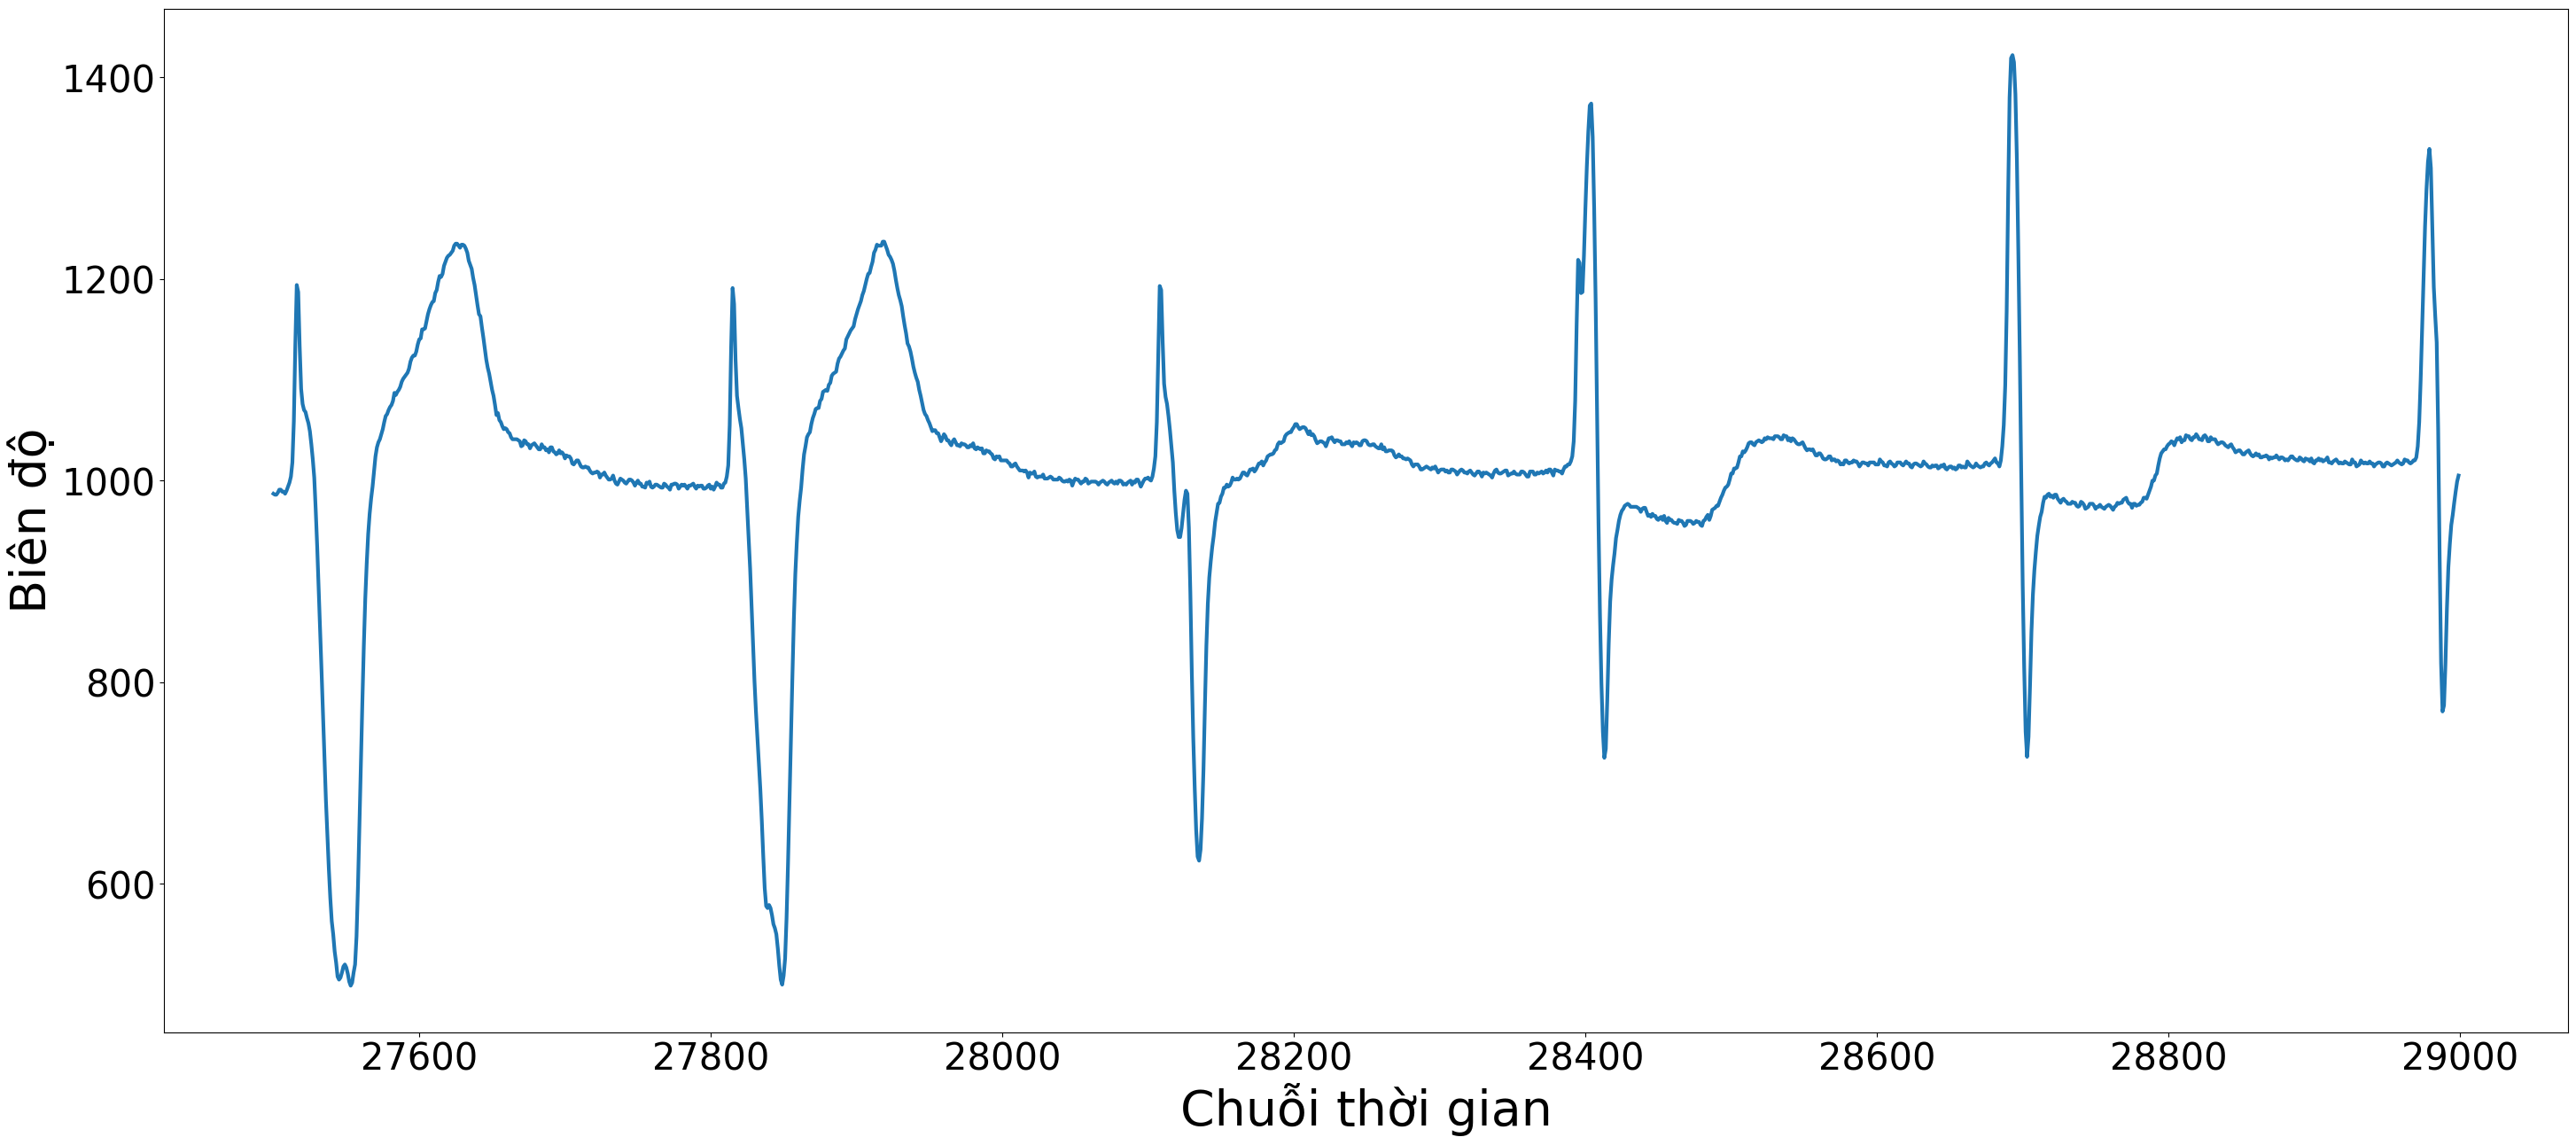

In [111]:
data_test = data_test_plot.rename(columns={data_test_plot.columns[0]: 'V2'})
plt.figure(figsize=(35, 15))
plt.plot(data_test,label = "V2",linewidth=3)
plt.ylabel('Biên độ',fontsize = 40)
plt.xlabel('Chuỗi thời gian',fontsize = 40)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.savefig('D:/Coding/ECG/notebook_test/img/102_datacut.png')
plt.show()

In [83]:
# Chuản hóa dữ liệu
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Áp dụng MinMaxScaler lên dữ liệu
data_test_scaled = scaler.fit_transform(data_test)

# Chuyển đổi lại thành DataFrame
data_test_scaled = pd.DataFrame(data_test_scaled, columns=data_test.columns)

# Kiểm tra dữ liệu sau khi chuẩn hóa
print("\nDữ liệu sau khi chuẩn hóa:")
print(data_test_scaled.head())


Dữ liệu sau khi chuẩn hóa:
         V2
0  0.528711
1  0.527627
2  0.527627
3  0.529794
4  0.533044


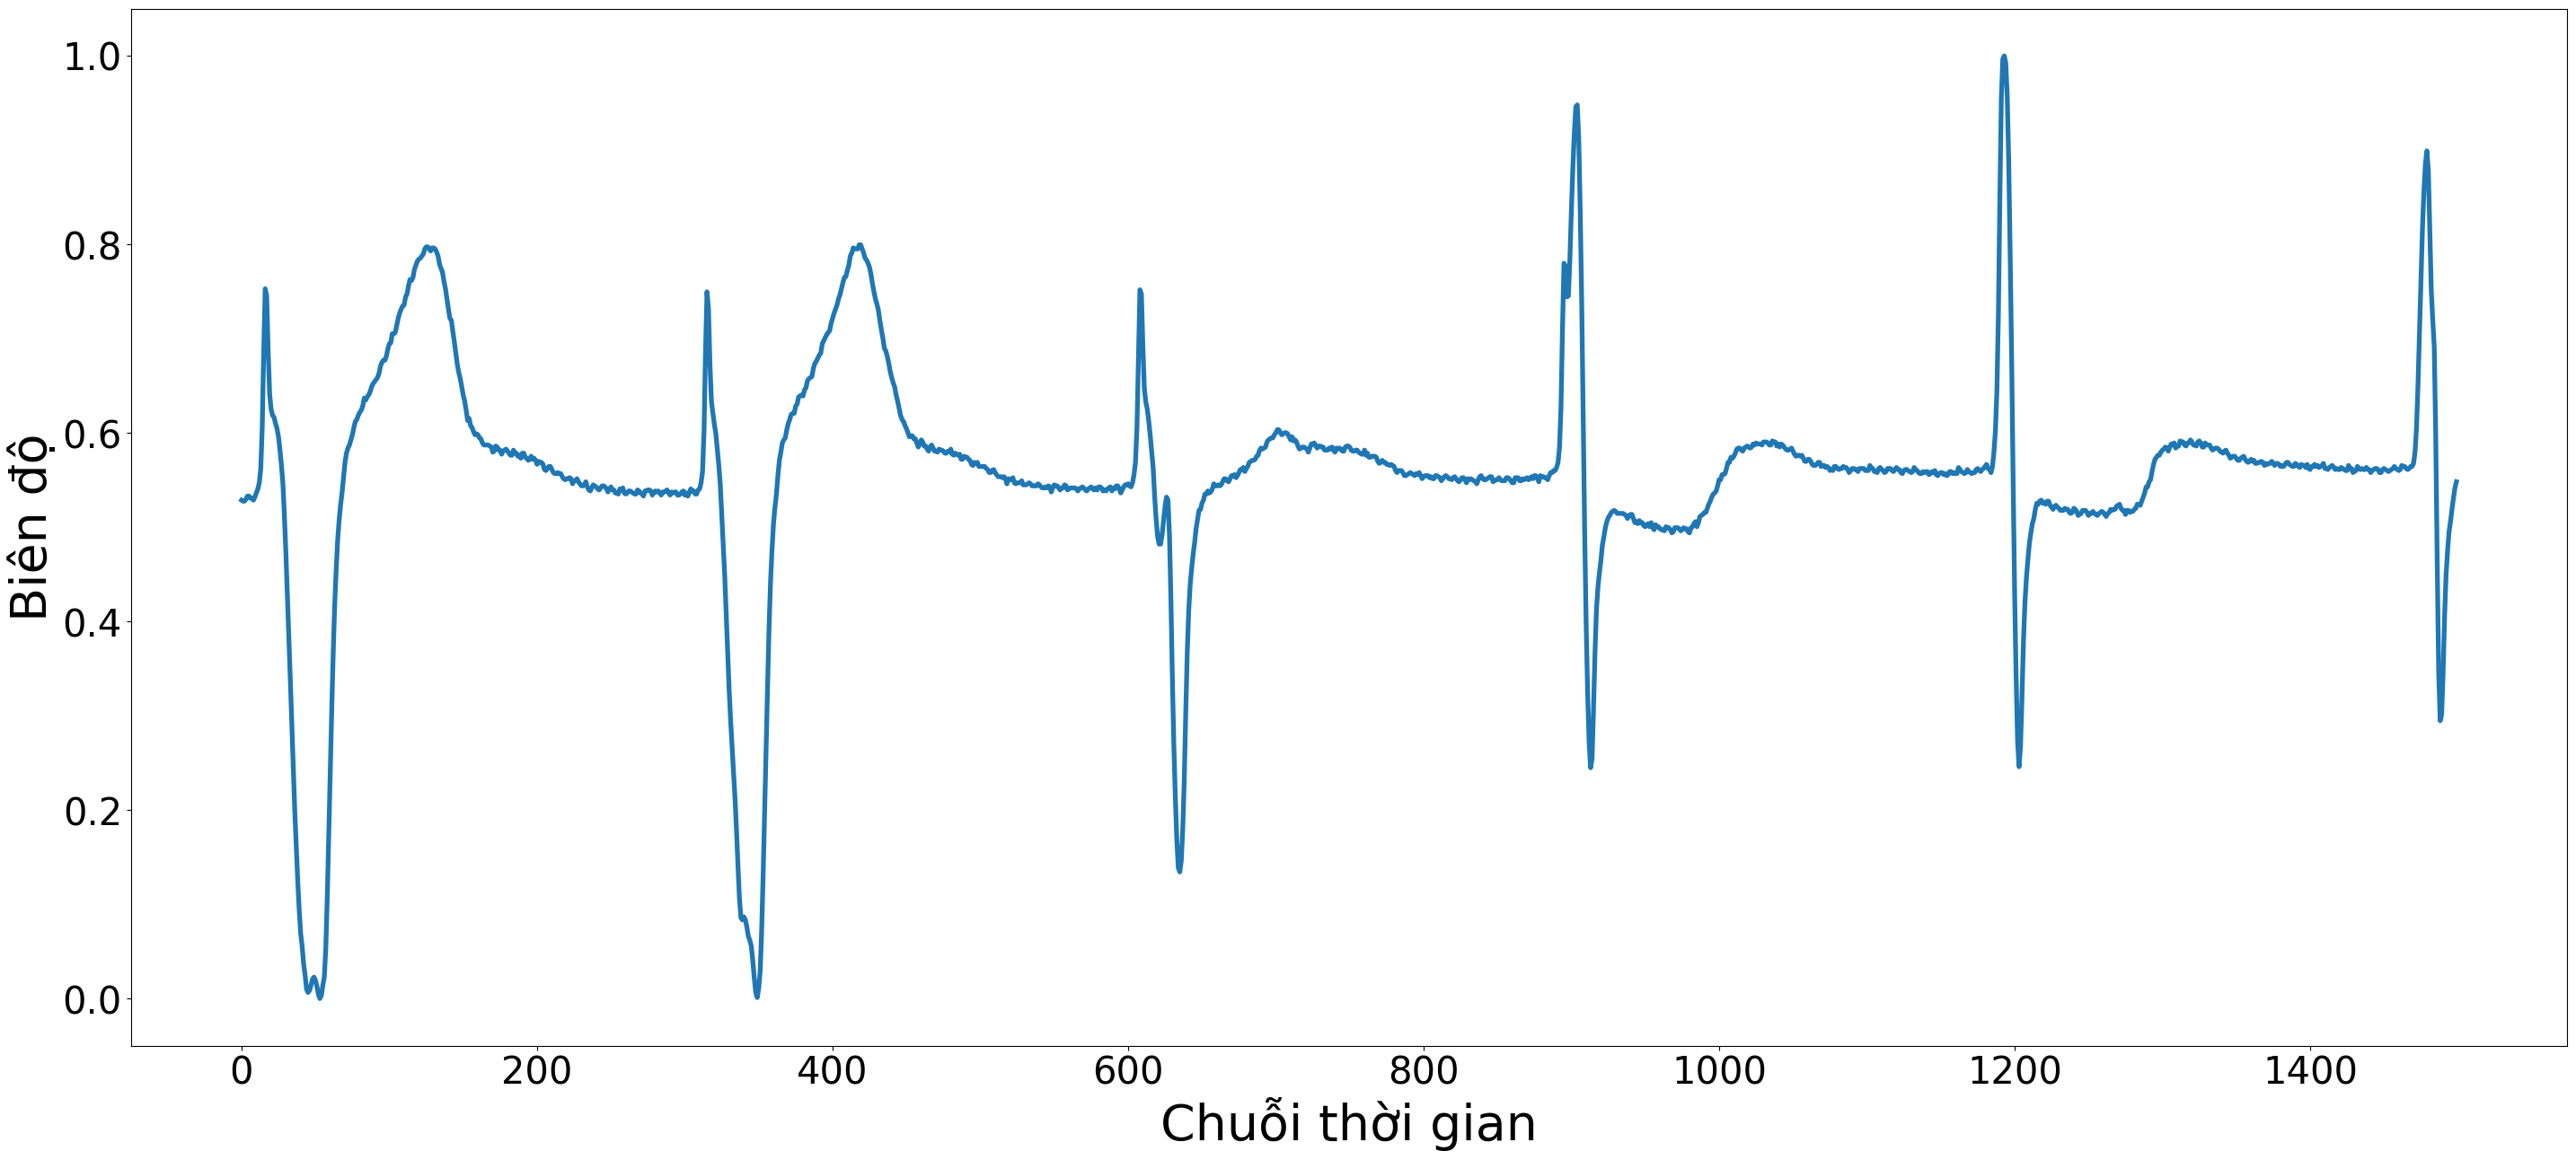

In [100]:
data_test_scaled = data_test_scaled.rename(columns={data_test_scaled.columns[0]: 'V2'})
plt.figure(figsize=(35, 15))
plt.plot(data_test_scaled,label = "V2",linewidth=3.8)
plt.ylabel('Biên độ',fontsize = 40)
plt.xlabel('Chuỗi thời gian',fontsize = 40)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.savefig('D:/Coding/ECG/notebook_test/img/data_normalize.png')
plt.show()

# Trích xuất dữ liệu lọc nhiễu

In [76]:
data_102 = pd.read_csv(r"D:\Coding\ECG\data\processed\data_102_filtered_100k.csv",header = None)
data_102.head()

,0
0,0.578490
1,0.578531
2,0.578573
3,0.578610
4,0.578631


             V2
0      0.578490
1      0.578531
2      0.578573
3      0.578610
4      0.578631
...         ...
99995  0.550833
99996  0.550618
99997  0.550406
99998  0.550194
99999  0.549987

[100000 rows x 1 columns]


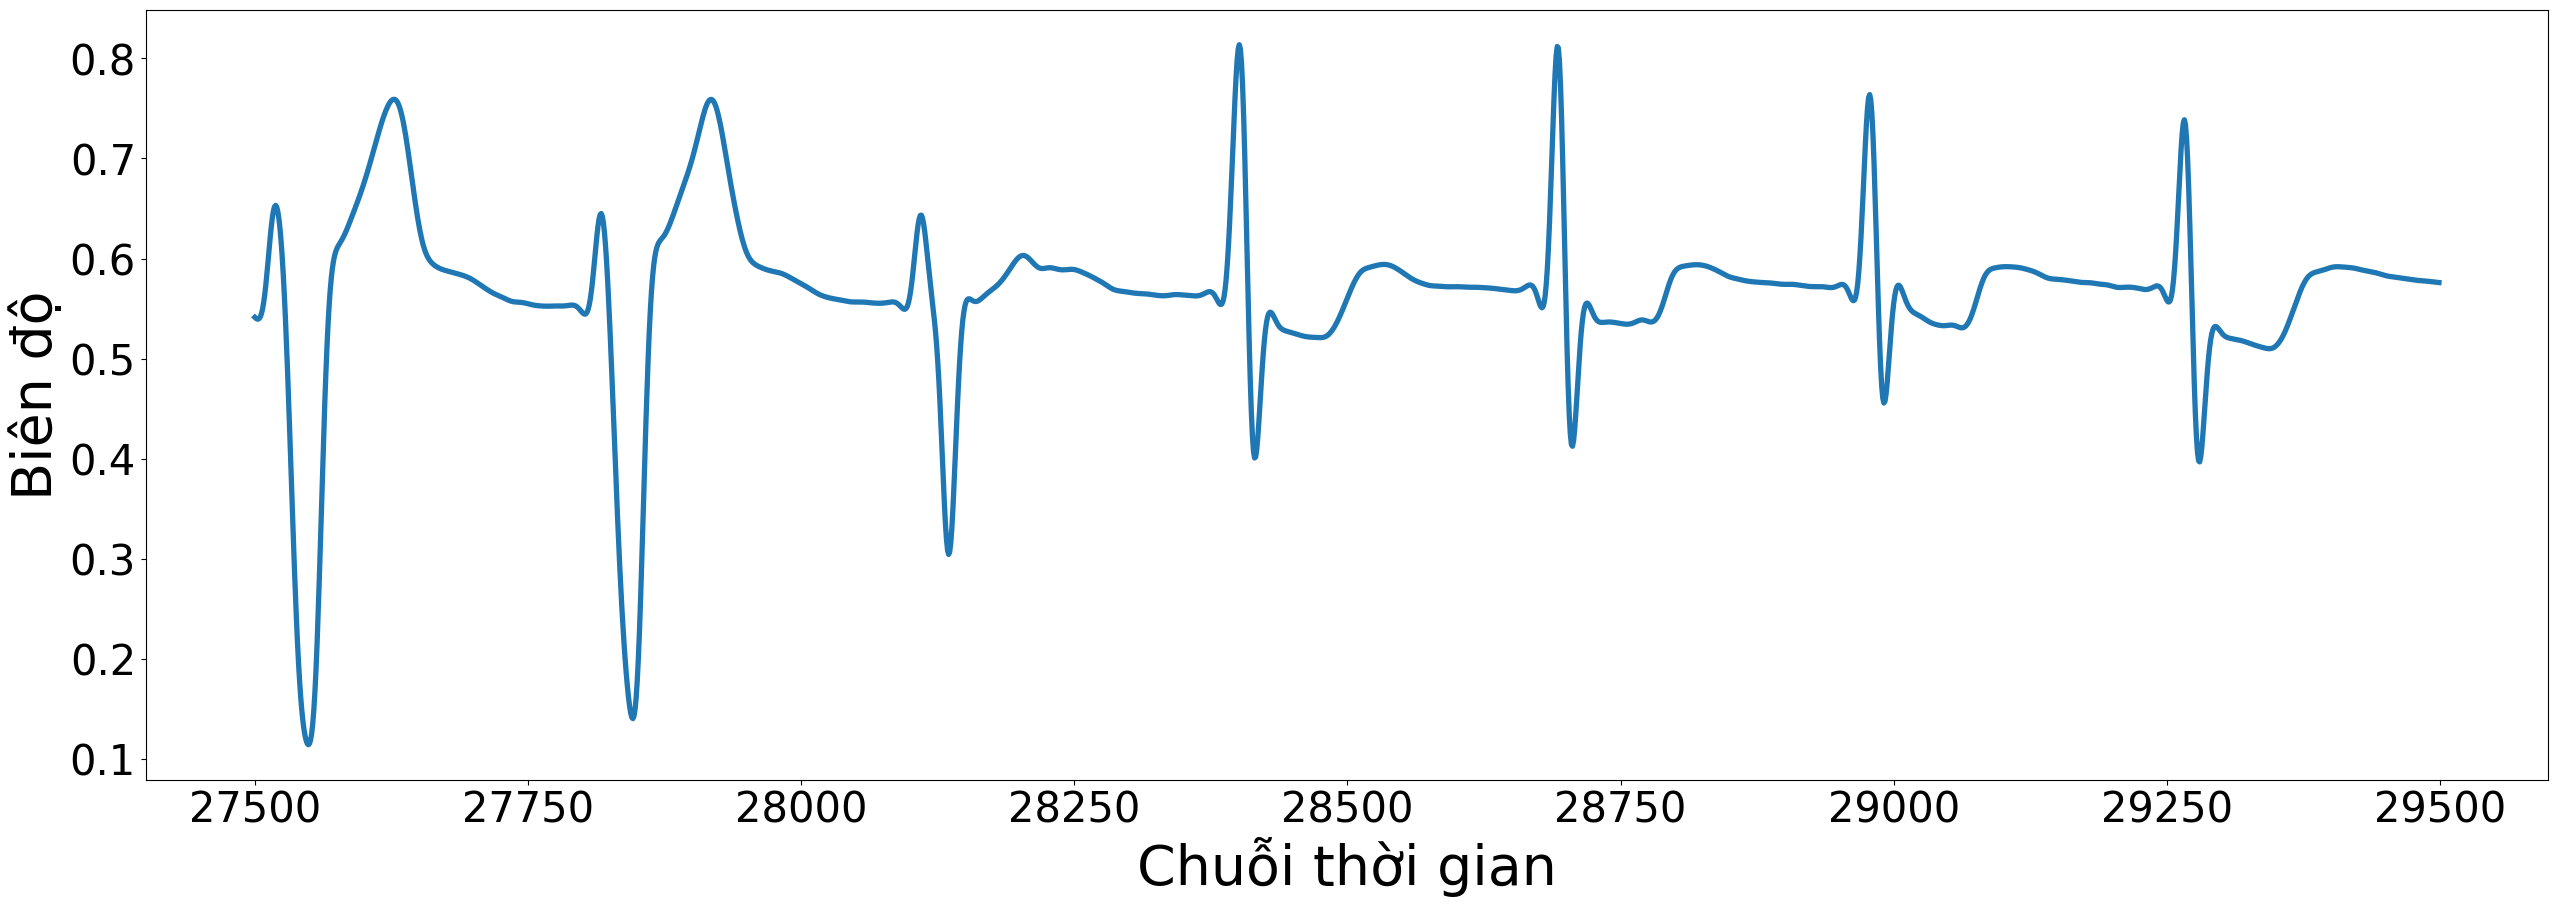

In [99]:
data_102 = data_102.rename(columns={data_102.columns[0]: 'V2'})
print(data_102)
plt.figure(figsize=(31, 10))
plt.plot(data_102[27500:29500],label = "V2",linewidth=3.8)
plt.ylabel('Biên độ',fontsize = 40)
plt.xlabel('Chuỗi thời gian',fontsize = 40)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.savefig('D:/Coding/ECG/notebook_test/img/data_filter.png')
plt.show()

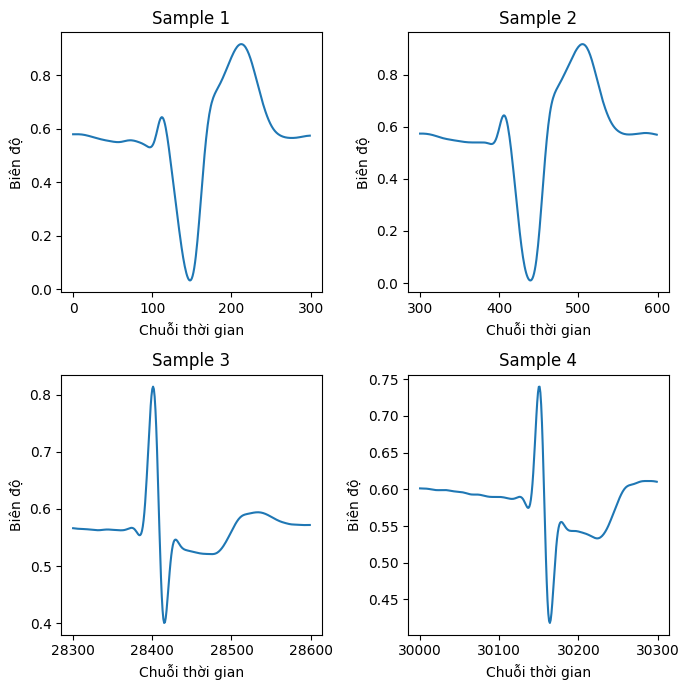

In [10]:
# Import thư viện matplotlib
import matplotlib.pyplot as plt

# Dữ liệu mẫu
X = data_102["V2"]

# Cắt dữ liệu theo yêu cầu
segment_lengths = [300, 300, 300, 300]
start_indices = [0, 300, 28300, 30000]

# Tạo hình chứa 4 subplot
fig, axs = plt.subplots(2, 2, figsize=(7, 7))  # Kích thước hình vuông

# Vẽ từng đoạn beat lên từng subplot
for i in range(4):
    row = i // 2  # Dòng của subplot
    col = i % 2   # Cột của subplot
    
    axs[row, col].plot(X[start_indices[i]:start_indices[i]+segment_lengths[i]], label="X")
    axs[row, col].set_ylabel('Biên độ')
    axs[row, col].set_xlabel('Chuỗi thời gian')
    axs[row, col].tick_params(axis='x', labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=10)
    axs[row, col].set_title(f'Sample {i+1}')  # Đặt tiêu đề cho từng subplot

plt.tight_layout()

# Lưu hình dưới dạng tệp SVG
fig.savefig('output_figure.png', format='png')

# Hiển thị hình
plt.show()


In [11]:
# Chuyển data về dạng vector
data_array = data_102['V2'].to_numpy()
print("Shape of ECG data Vector format:", data_array.shape)
print("Data_array:",data_array)

Shape of ECG data Vector format: (100000,)
Data_array: [0.57848998 0.57853054 0.5785732  ... 0.55040564 0.55019422 0.54998724]


---

---

---

### Tạo dữ liệu để huấn luyện mô hình 

#### New dataset

#### Aug Data (Connect Data with another one)

Shape of Data for model training (12000,)
Shape of Data for model training (14100,)


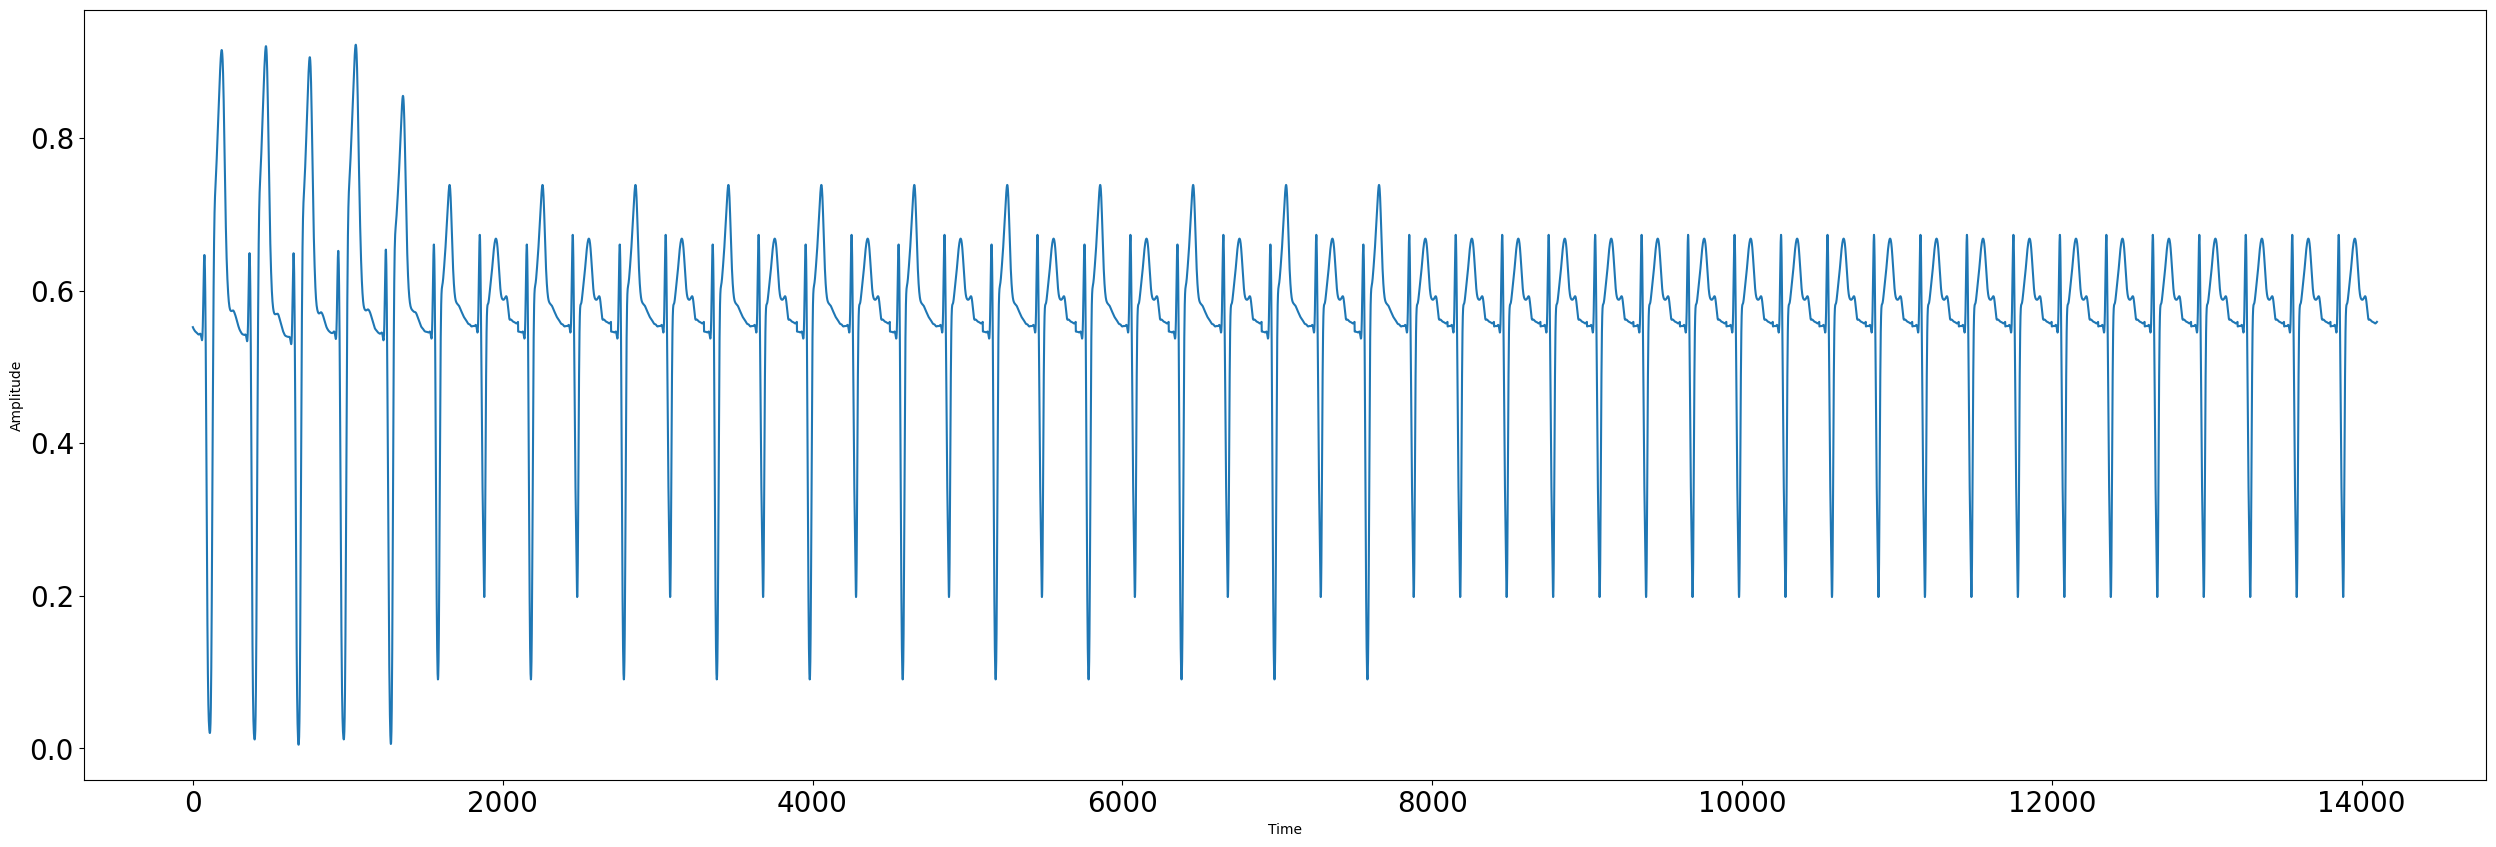

In [36]:
aug_data_con =  data_array[97000:99100] 

# data heart disease part 1
data_disease_1 =  data_array[98500:99100] 
duplicated_arr_part1 = np.tile(data_disease_1, 10)

# data heart disease part 1
data_disease_2 =  data_array[98800:99100] 
duplicated_arr_part2 = np.tile(data_disease_2, 20)

# Connect duplicated_arr_part1 and duplicated_arr_part2
duplicated_arr = np.concatenate((duplicated_arr_part1, duplicated_arr_part2), axis=0)
print("Shape of Data for model training",duplicated_arr.shape)

# Connect duplicated_arr and aug_data_con
aug_data = np.concatenate((aug_data_con, duplicated_arr), axis=0)
print("Shape of Data for model training",aug_data.shape)


plt.figure(figsize=(31, 10))
plt.plot(aug_data,label = "V2")
plt.ylabel('Amplitude')
plt.xlabel('Time')
# Tùy chỉnh kích thước chữ trên các trục
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

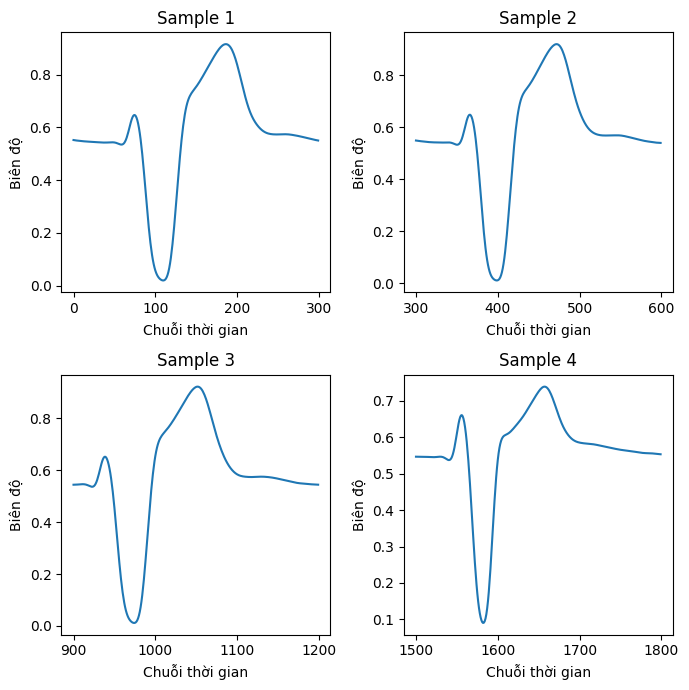

In [84]:
testing = pd.DataFrame(aug_data)
testing_rename = testing.rename(columns={testing.columns[0]: 'V2'})

X = testing_rename["V2"]

# Cắt dữ liệu theo yêu cầu
segment_lengths = [300, 300, 300, 300]
start_indices = [0, 300, 900, 1500]

# Tạo hình chứa 4 subplot
fig, axs = plt.subplots(2, 2, figsize=(7, 7))  # Kích thước hình vuông

# Vẽ từng đoạn beat lên từng subplot
for i in range(4):
    row = i // 2  # Dòng của subplot
    col = i % 2   # Cột của subplot
    
    axs[row, col].plot(X[start_indices[i]:start_indices[i]+segment_lengths[i]], label="X")
    axs[row, col].set_ylabel('Biên độ')
    axs[row, col].set_xlabel('Chuỗi thời gian')
    axs[row, col].tick_params(axis='x', labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=10)
    axs[row, col].set_title(f'Sample {i+1}')  # Đặt tiêu đề cho từng subplot

plt.tight_layout()

# Lưu hình dưới dạng tệp SVG
fig.savefig('output_figure.png', format='png')

# Hiển thị hình
plt.show()


---

In [85]:
# data_training = data_array[0:40000]
data_training_aug = np.concatenate((data_array[0:50000], aug_data), axis=0)
print("Shape of Data for model training",data_training_aug.shape)

Shape of Data for model training (64100,)


In [92]:
# connect data_training_aug with more 40k point
training_dataset = np.concatenate((data_training_aug, data_array[0:35900]), axis=0)
print("Shape of Data for model training",training_dataset.shape)

Shape of Data for model training (100000,)


### Save dataset

In [108]:
# Chuyển sang pandas DataFrame
df_training = pd.DataFrame(training_dataset)

# Lưu dưới dạng file CSV
df_training.to_csv("D:/Coding/ECG/data/processed/custom_training_dataset.csv", index=False)


### Complete Dataset

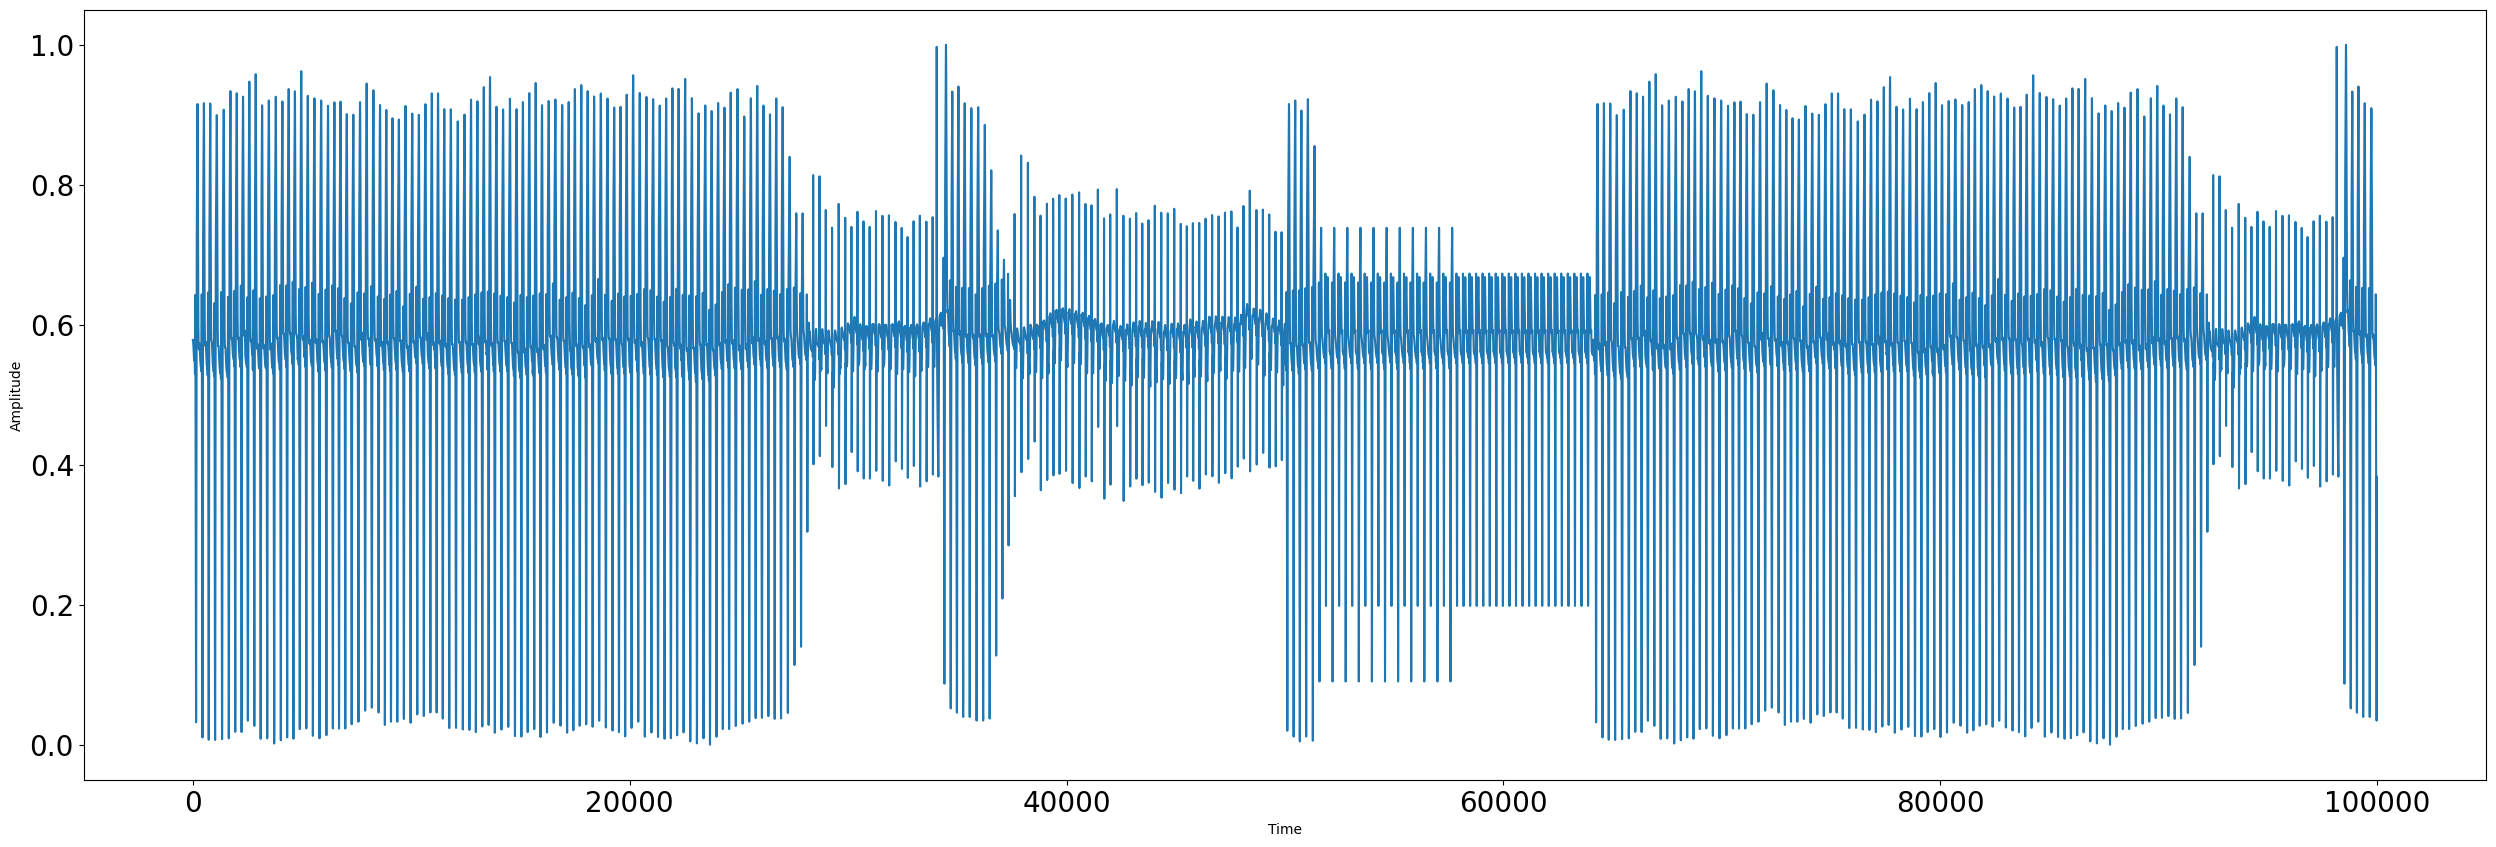

In [109]:
plt.figure(figsize=(31, 10))
plt.plot(training_dataset,label = "V2")
plt.ylabel('Amplitude')
plt.xlabel('Time')
# Tùy chỉnh kích thước chữ trên các trục
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

### Sau khi quan sát các chu kì, của kênh V2 ta thấy cứ 300 điểm dữ liệu thì sẽ hoàn thành 1 chu kì

In [98]:
#train_size = int(len(data_training) * 0.95)
#train_data = data_training[:train_size:]

# data_training shape = 5000

train_size = int(len(training_dataset) * 0.85)
test_size = len(training_dataset) - train_size
train_data, test_data = training_dataset[:train_size], training_dataset[train_size:]

print("Kích thước của tập train:", train_data.shape)
print("Kích thước của tập test:", test_data.shape)

Kích thước của tập train: (85000,)
Kích thước của tập test: (15000,)


### Time Series of Training Data

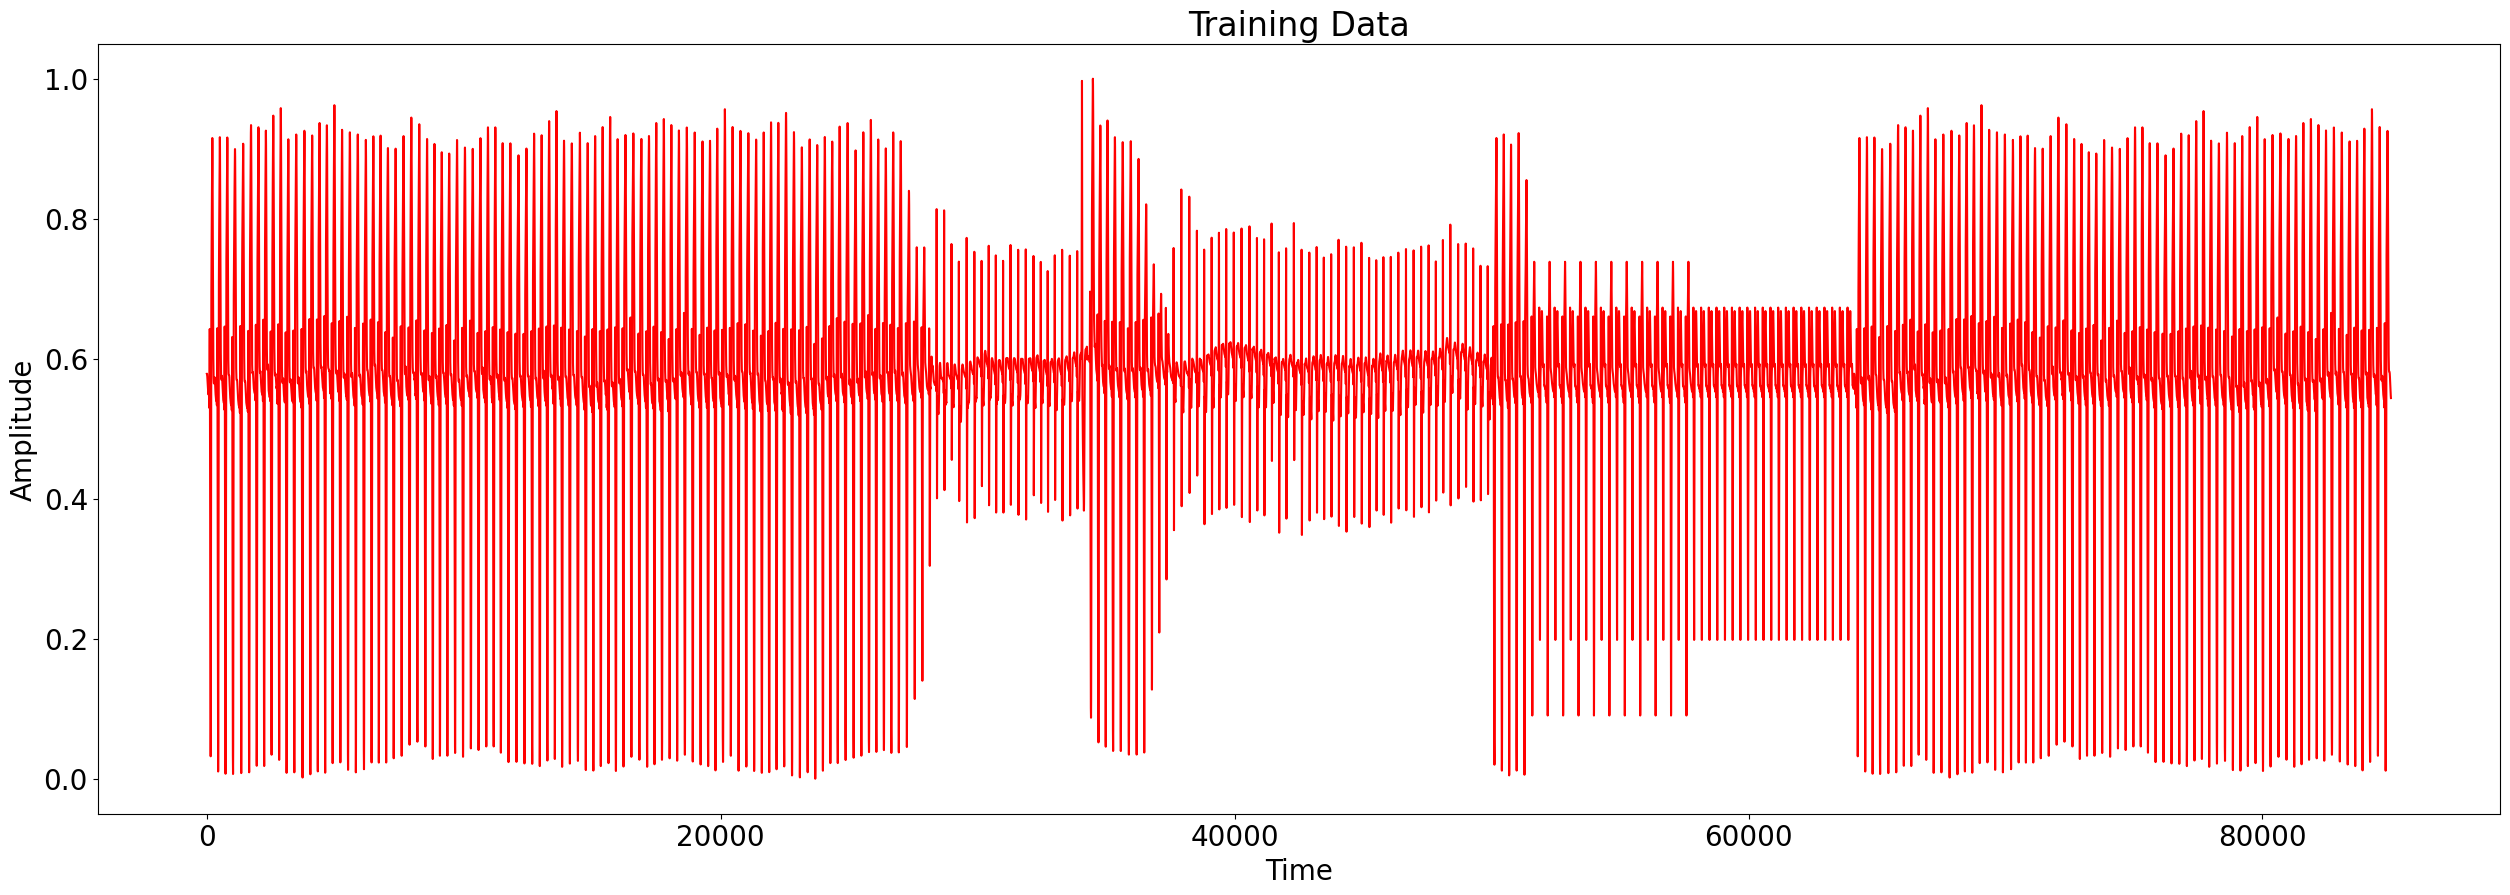

In [99]:
plt.figure(figsize=(31, 10))
plt.plot(train_data,label = "V2", color = "red")
plt.ylabel('Amplitude',size = 20)
plt.xlabel('Time',size = 20)
plt.title('Training Data', size=24)
# Tùy chỉnh kích thước chữ trên các trục
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

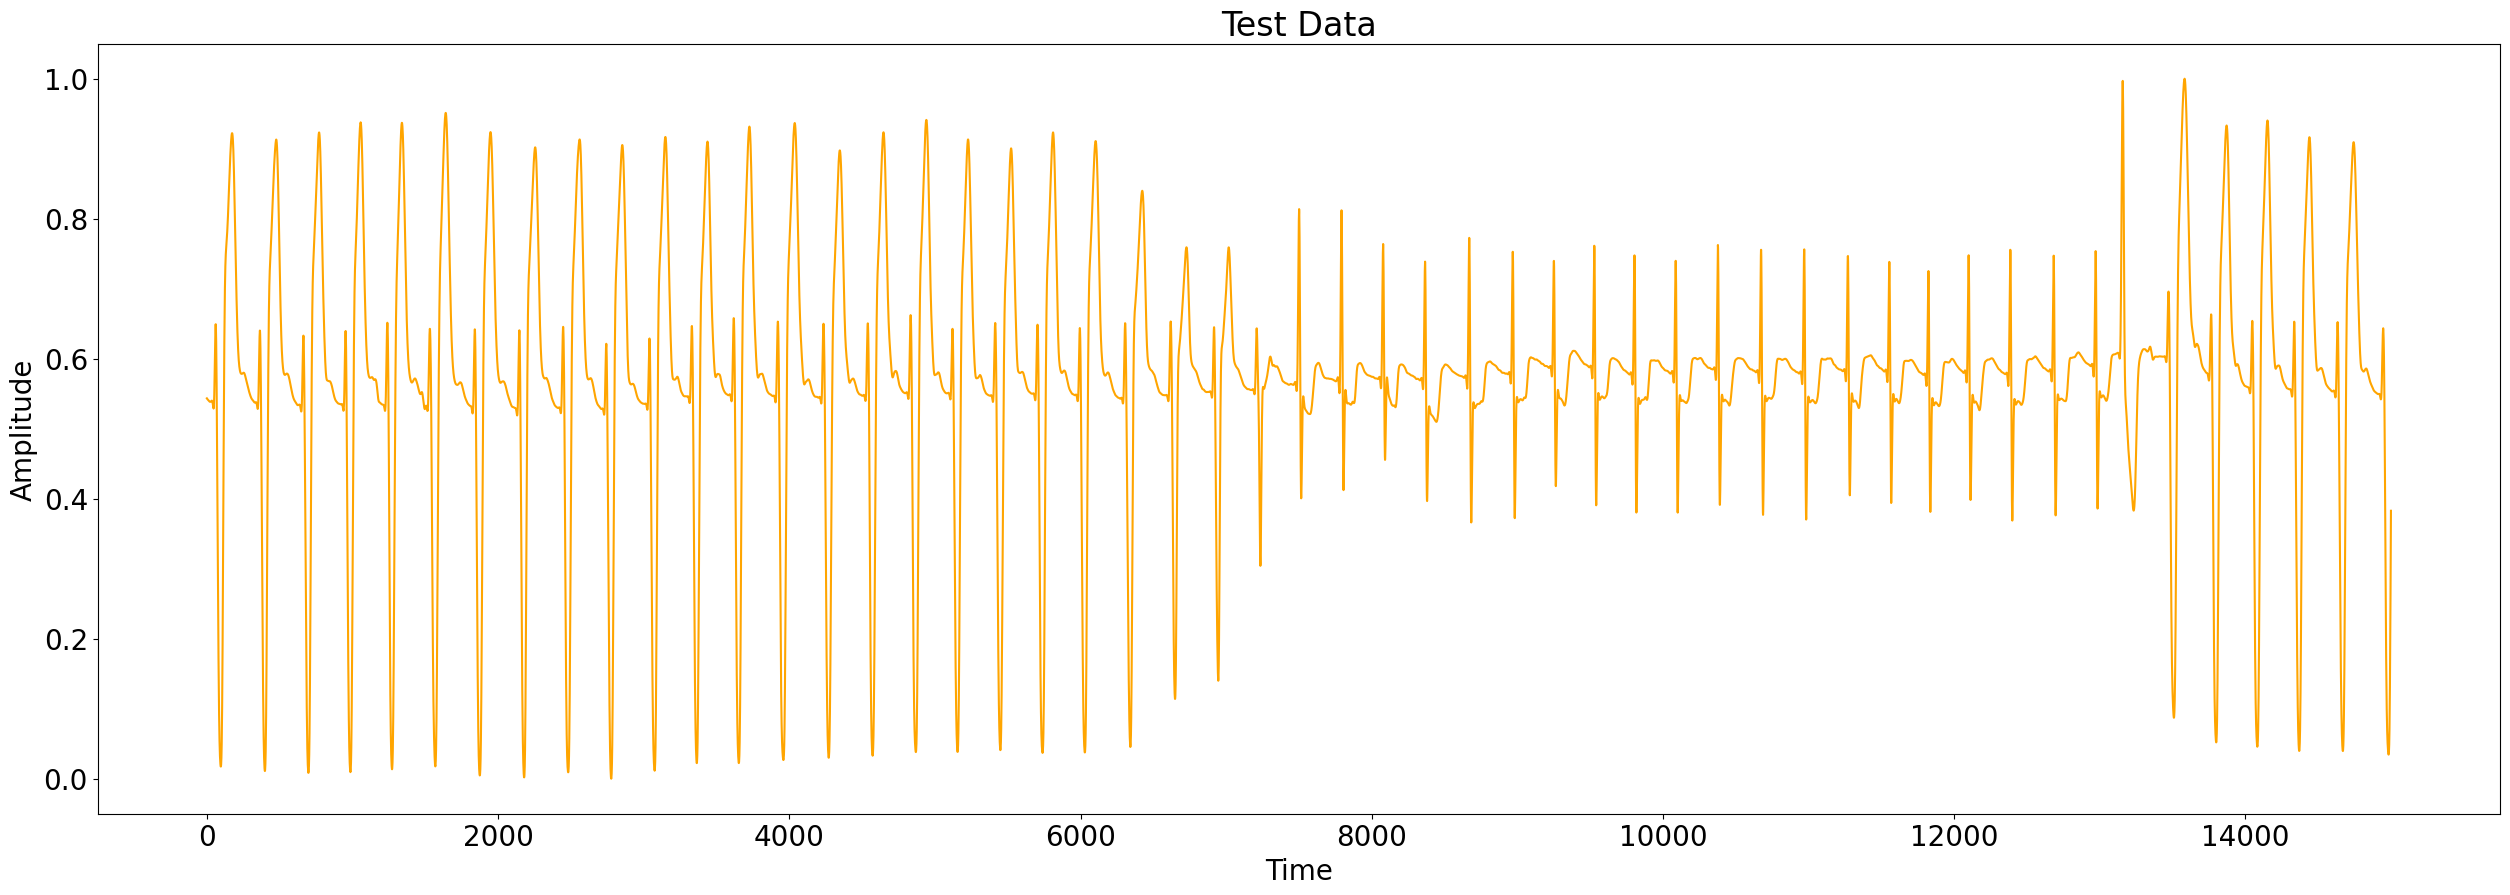

In [101]:
plt.figure(figsize=(31, 10))
plt.plot(test_data,label = "V2",color = "orange")
plt.ylabel('Amplitude',size = 20)
plt.xlabel('Time',size = 20)
plt.title('Test Data', size=24)
# Tùy chỉnh kích thước chữ trên các trục
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

### Time Series of Test Data

## Khởi tạo time step, tập train và test

In [102]:
import numpy as np

#look_back = 300  # số lượng quan sát trước đó để dự đoán quan sát hiện tại
#train_size = int(len(data_training) * 0.90)
#train_data = data_training[:train_size]

def create_dataset(dataset, look_back=1):
    X, Y = [],[]
    for i in range (len(dataset) - look_back - 1):
        X.append(dataset[i:(i+look_back)])
        Y.append(dataset[i+look_back])
    
    return np.array(X), np.array(Y)


In [103]:
look_back = 300
# Gọi hàm để tạo dữ liệu
X_train, Y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data,look_back)
print(X_train.shape) # (số lượng dữ liệu, time_step )
print(Y_train.shape)
print(X_test.shape)
print(y_test.shape)

(84699, 300)
(84699,)
(14699, 300)
(14699,)


In [104]:
# Đầu vào của LSTM cần có định dạng (batch_size, timesteps, features). 
# Nên chúng ta sẽ reshape kích thước của dữ liệu
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)

(84699, 300, 1)
(14699, 300, 1)


In [ ]:
Stop

NameError: name 'Stop' is not defined

# 1D-CNN + Bi-LSTM Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, Dense, Bidirectional, BatchNormalization, LeakyReLU, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import time

class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.start = time.time()
    
    def on_train_end(self, logs={}):
        self.end = time.time()
        self.total_time = self.end - self.start
        print(f"Total training time: {self.total_time:.2f} seconds")
        
strategy = tf.distribute.MirroredStrategy()
        
with strategy.scope():
    # Define the model
    model = Sequential()

    # Khối CNN đầu tiên với input_shape
    model.add(Conv1D(filters=128, kernel_size=10, padding='same', activation='relu', input_shape=(300, 1)))
    model.add(Conv1D(filters=128, kernel_size=10, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    # Các khối CNN tiếp theo (không cần input_shape)
    for _ in range(2):  # Chỉ cần lặp 2 lần nữa vì đã có 1 khối ở trên
        model.add(Conv1D(filters=128, kernel_size=10, padding='same', activation='relu'))
        model.add(Conv1D(filters=128, kernel_size=10, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Dropout(0.2))
        model.add(BatchNormalization())

    # Bi-LSTM layers for temporal learning
    model.add(Bidirectional(LSTM(100, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    #model.add(Bidirectional(LSTM(100, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(100, return_sequences=False, kernel_regularizer=regularizers.l2(0.01))))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Fully connected output layer
    model.add(Dense(1, activation="linear", kernel_regularizer=regularizers.l2(0.01)))

    model.summary()

    # Compile the model
    model.compile(
        loss='mean_squared_error',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )


# Ensure the output directory exists
output_dir = "/kaggle/working/ECG_best_weight"
os.makedirs(output_dir, exist_ok=True)

# Initialize callbacks
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(output_dir, 'weights-{epoch:02d}.weights.h5'), 
    monitor='val_loss',
    save_weights_only=True,
    save_best_only=True
)

tb_callback = TensorBoard(log_dir='logs')

# Initialize time callback
time_callback = TimeHistory()

# Fit the model
history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    batch_size=512,  
    epochs=500,
    verbose=1,
    callbacks=[checkpoint_callback, tb_callback, time_callback]
)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


c:\Users\PHAN NHAT ANH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 300, 128)       │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 300, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 150, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 150, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 150, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 75, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 75, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 37, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 37, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 37, 200)        │       183,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 37, 200)        │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 37, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,248,585 (4.76 MB)

 Trainable params: 1,247,017 (4.76 MB)

 Non-trainable params: 1,568 (6.12 KB)


Epoch 1/500
 1/53 ━━━━━━━━━━━━━━━━━━━━ 7:10 8s/step - accuracy: 0.0000e+00 - auc: 0.0000e+00 - loss: 12.8042

KeyboardInterrupt: 

In [ ]:
"""from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/kaggle/working/model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image('model.png')
"""

"from tensorflow.keras.utils import plot_model\nplot_model(model, to_file='/kaggle/working/model.png', show_shapes=True, show_layer_names=True)\nfrom IPython.display import Image\nImage('model.png')\n"

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict

1054/1054 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


array([[0.55823505],
       [0.55800843],
       [0.5577796 ],
       ...,
       [0.5741134 ],
       [0.57397944],
       [0.5690046 ]], dtype=float32)

In [ ]:
# Chuyển dữ liệu về dạng ban đầu.
#train_predict = scaler.transform(train_predict)
#test_predict = scaler.transform(test_predict)

In [ ]:
train_predict.shape

(33699, 1)

In [ ]:
#Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
#y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
Y_train

array([0.57343032, 0.57350984, 0.57353441, ..., 0.60609793, 0.60611065,
       0.60611862])

In [ ]:
import math 
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("Sai số trung bình giữa giá trị thực tế và dự đoán trên tập huấn luyện là:", round(math.sqrt(mean_squared_error(Y_train, train_predict)), 3))

# Tính toán MAE
mae = round(mean_absolute_error(Y_train, train_predict), 3)
print("Sai số trung bình tuyệt đối giữa giá trị thực tế và dự đoán trên tập huấn luyện (MAE):", mae)

Sai số trung bình giữa giá trị thực tế và dự đoán trên tập huấn luyện là: 0.041
Sai số trung bình tuyệt đối giữa giá trị thực tế và dự đoán trên tập huấn luyện (MAE): 0.028


In [ ]:
## Tính RMSE trên test DATA

print("Sai số trung bình giữa giá trị thực tế và dự đoán trên tập kiểm tra là:", round(math.sqrt(mean_squared_error(y_test,test_predict)), 3))

# Tính toán MAE
mae = round(mean_absolute_error(y_test,test_predict), 3)
print("Sai số trung bình tuyệt đối giữa giá trị thực tế và dự đoán trên tập huấn luyện (MAE):", mae)

Sai số trung bình giữa giá trị thực tế và dự đoán trên tập kiểm tra là: 0.063
Sai số trung bình tuyệt đối giữa giá trị thực tế và dự đoán trên tập huấn luyện (MAE): 0.038


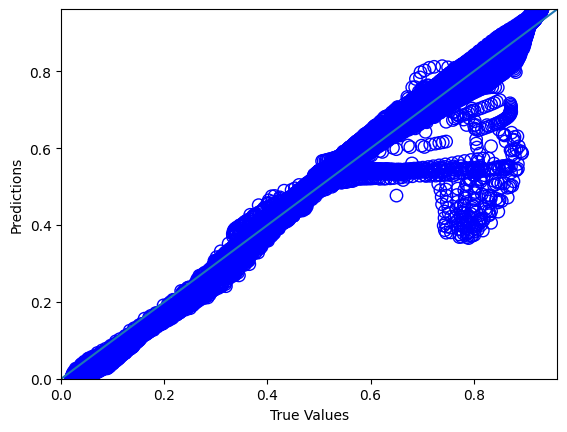

In [ ]:
plt.scatter(train_predict, Y_train, s=80, facecolors='none', edgecolors='b')
plt.xlabel('True Values')
plt.ylabel('Predictions')
# Điều chỉnh giới hạn của trục x và y dựa trên giá trị min và max của dữ liệu
lims = [
    min(train_predict.min(), Y_train.min()),
    max(train_predict.max(), Y_train.max())
]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)  # Vẽ đường y=x để so sánh
plt.show()

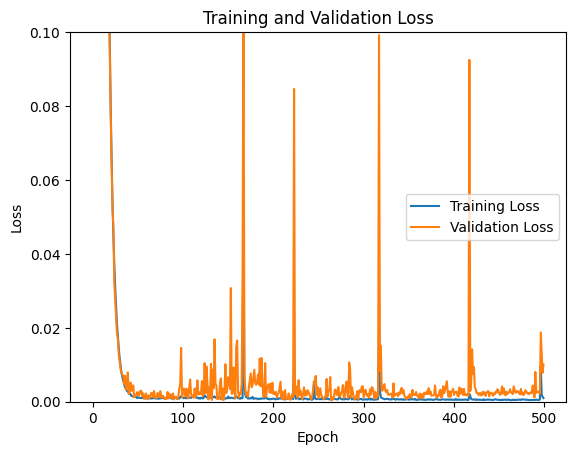

"# Vẽ đồ thị accuracy\nplt.plot(train_acc, label='Training Accuracy')\nplt.plot(val_acc, label='Validation Accuracy')\nplt.title('Training and Validation Accuracy')\nplt.xlabel('Epoch')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()"

In [ ]:
import matplotlib.pyplot as plt

# Lấy các giá trị loss từ history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Lấy các giá trị accuracy từ history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylim(0, 0.1)
plt.ylabel('Loss')
plt.legend()
plt.show()

"""# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()"""


### Tập dữ liệu gốc và quá trình tái lập dữ liệu của mô hình trên tập Train

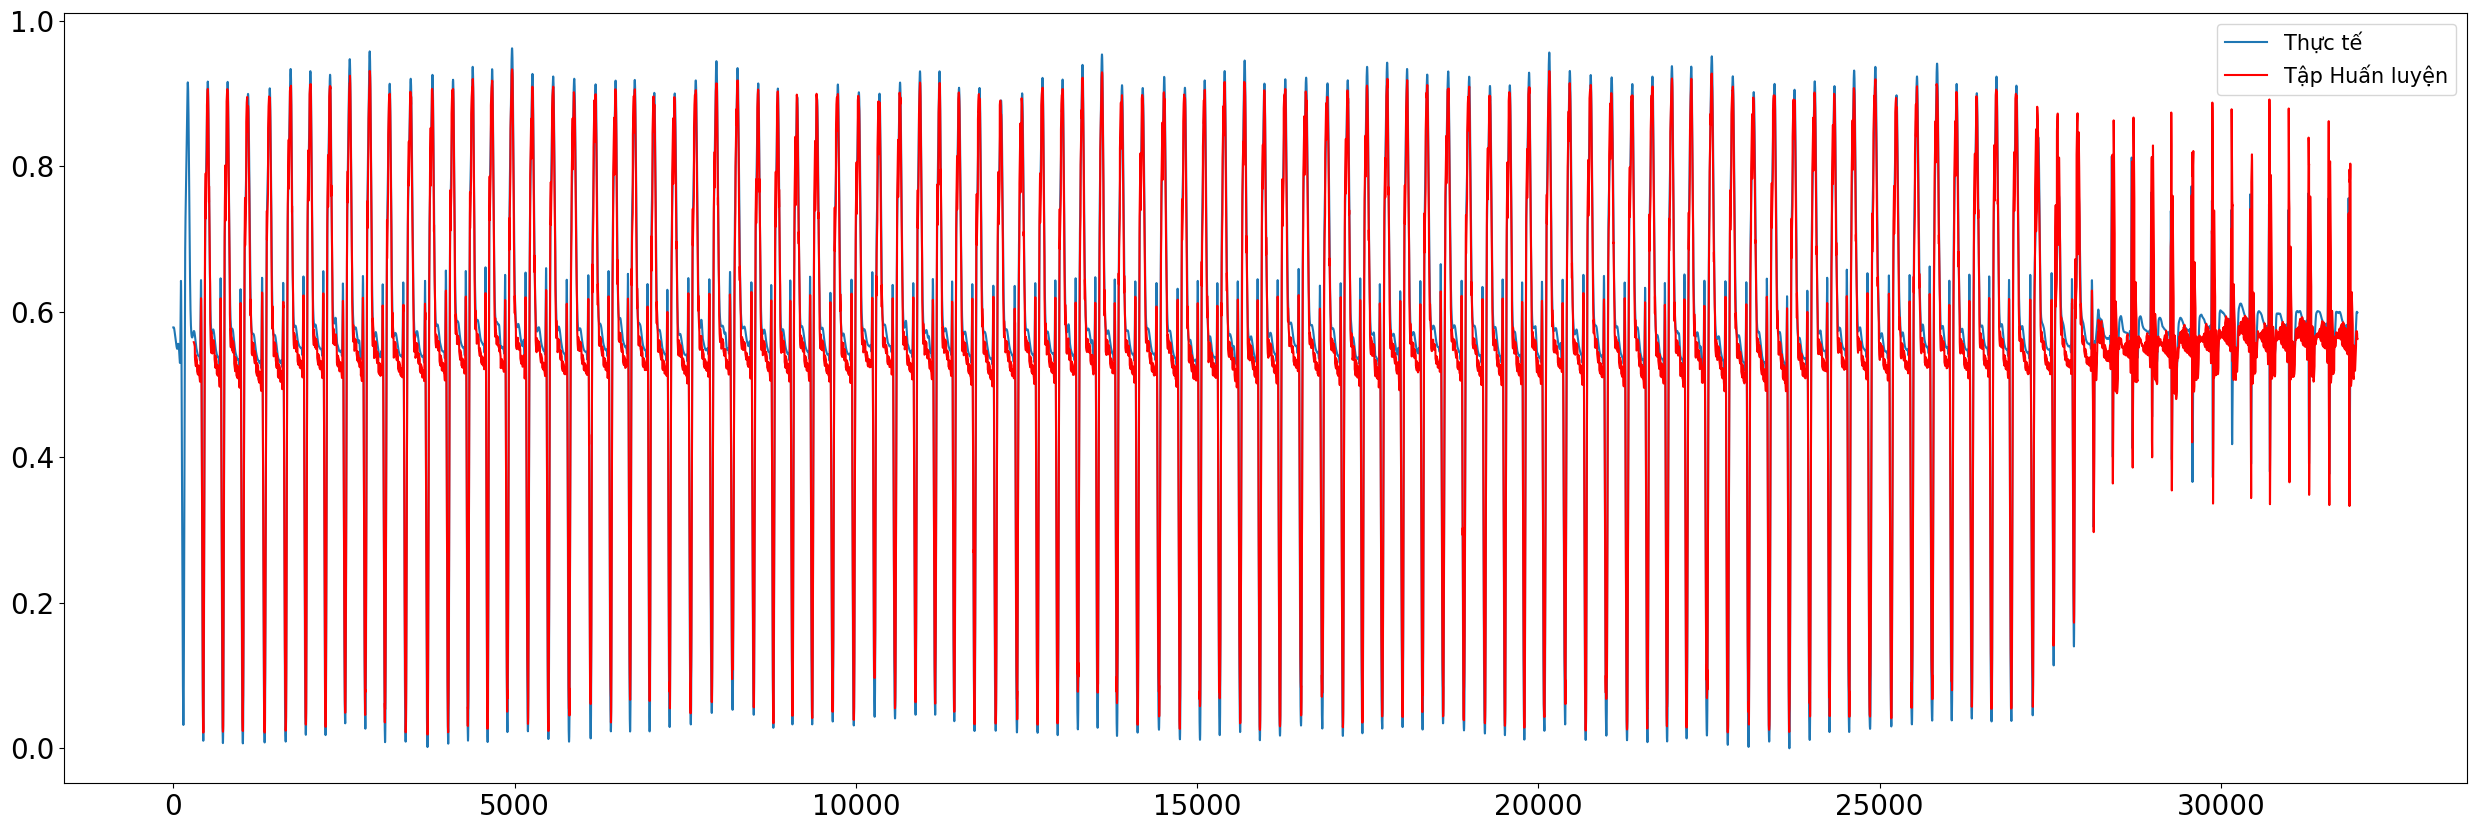

In [ ]:
# Lấy số phần tử của Y_train để đảm bảo rằng x và y có cùng kích thước
train_size_adjusted = min(train_size, 32000) - look_back

# Đảm bảo train_predict chỉ lấy đúng số phần tử để khớp với range
plt.figure(figsize=(31, 10))
plt.plot(data_training[:32000])

# Sửa lại index của train_predict để khớp kích thước với x
plt.plot(range(look_back, look_back + train_size_adjusted ), 
         train_predict[:train_size_adjusted, 0],
         color='red')

plt.legend(['Thực tế', 'Tập Huấn luyện', 'Kiểm tra'], fontsize=15)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('/kaggle/working/train_resingal.png')
plt.show()


In [ ]:
range(look_back, look_back + train_size_adjusted)


4500

In [ ]:
min(4800, 32000) - look_back

4500

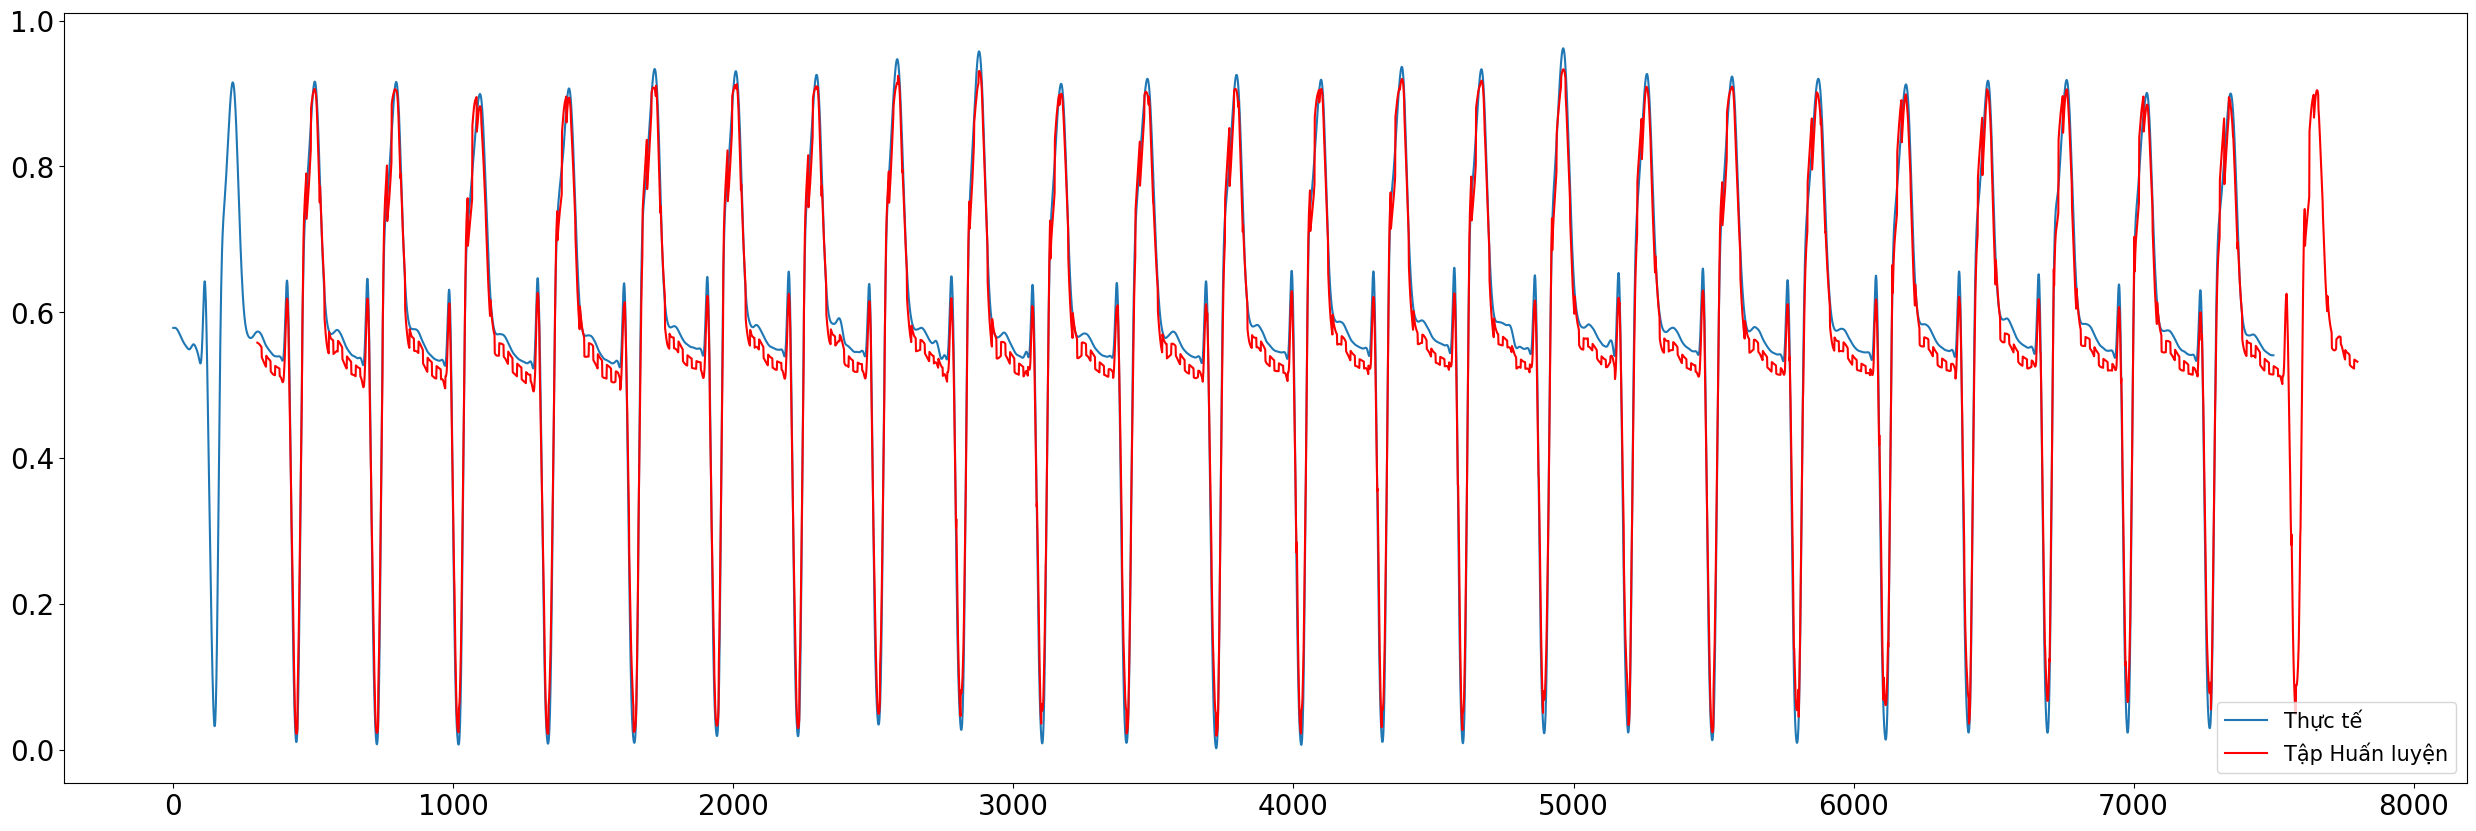

In [ ]:
# Lấy số phần tử của Y_train để đảm bảo rằng x và y có cùng kích thước
train_size_adjusted = min(7800, 32000) - look_back

# Đảm bảo train_predict chỉ lấy đúng số phần tử để khớp với range
plt.figure(figsize=(31, 10))
plt.plot(data_training[:7500])

# Sửa lại index của train_predict để khớp kích thước với x
plt.plot(range(look_back, look_back + train_size_adjusted ), 
         train_predict[:train_size_adjusted, 0],
         color='red')

plt.legend(['Thực tế', 'Tập Huấn luyện', 'Kiểm tra'], fontsize=15)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('/kaggle/working/train_resingal.png')
plt.show()


# Test

In [ ]:
test_predict.shape

(5699, 1)

In [ ]:
train_predict.shape

(33699, 1)

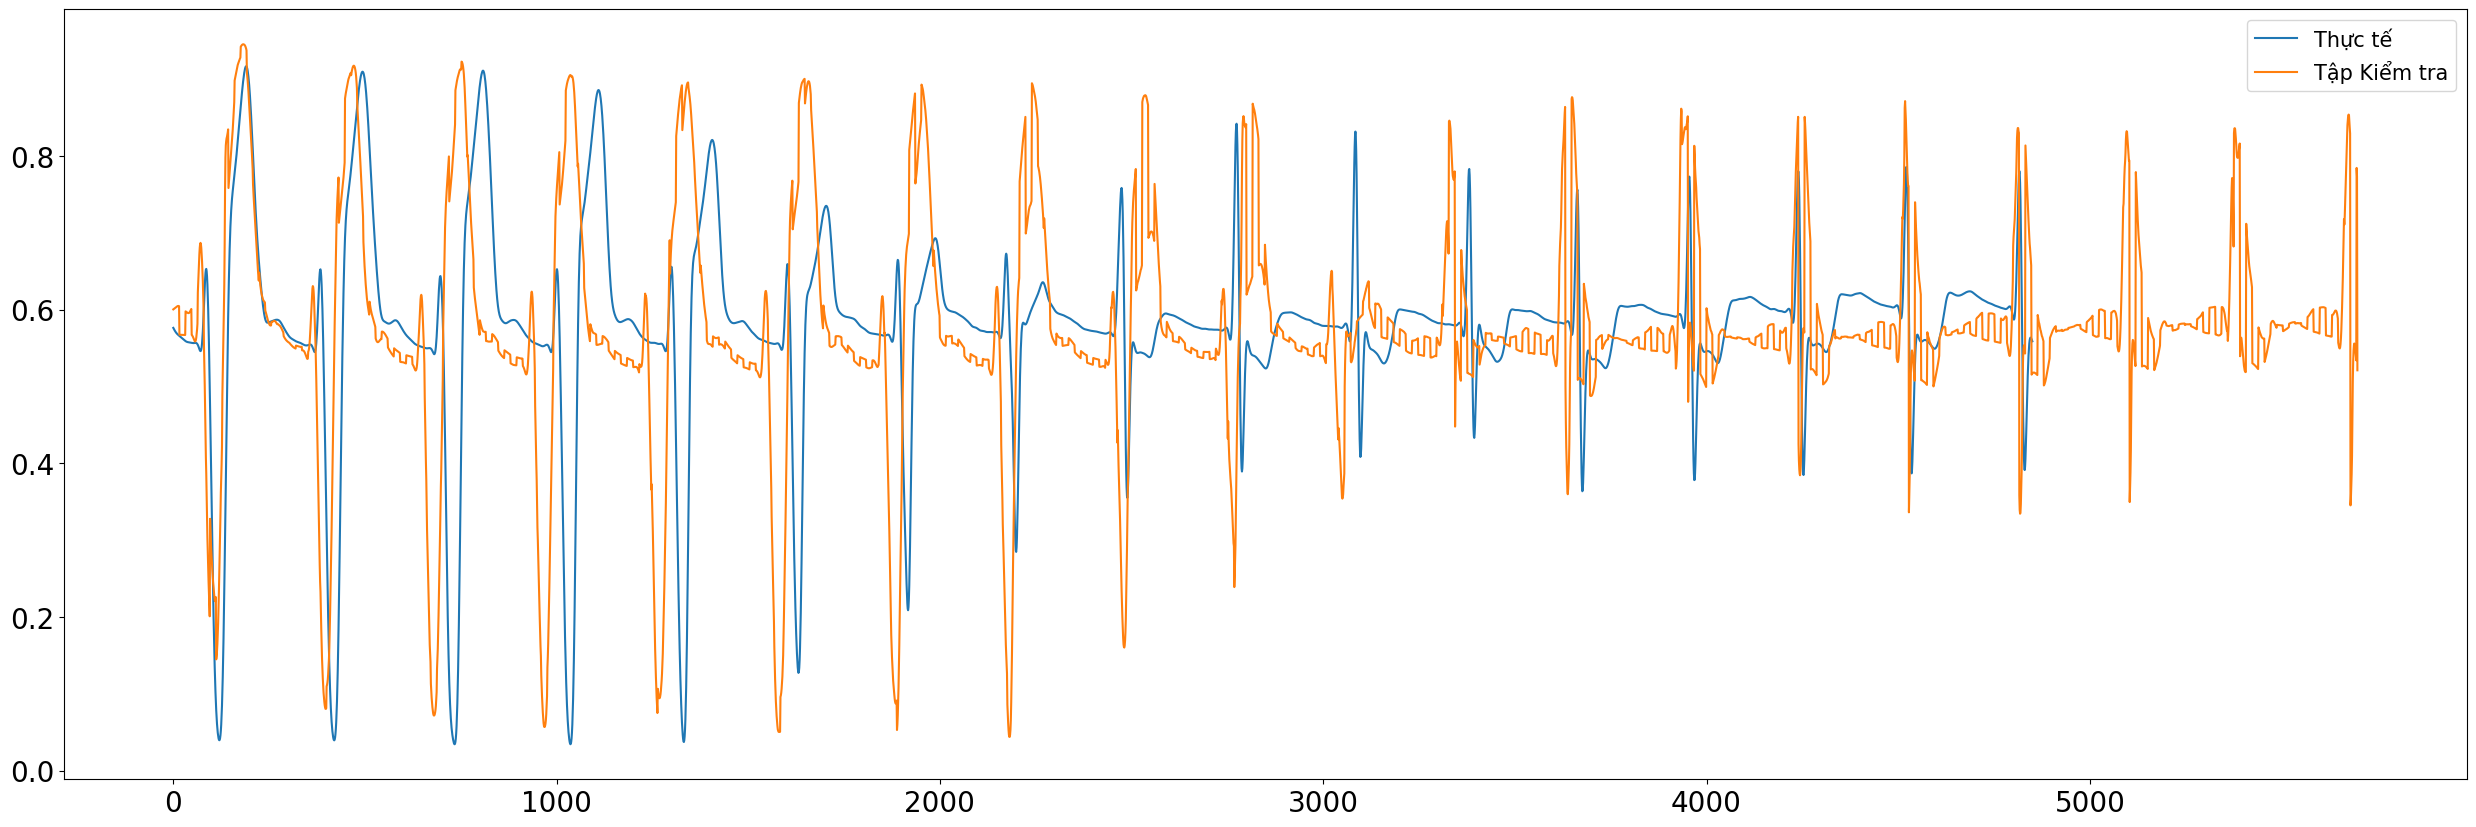

In [ ]:
plt.figure(figsize=(31, 10))
plt.plot(data_training[34549+600:])
plt.plot(test_predict[:])
#plt.plot(range((train_size) , len(data_100)), test_predict[0:9000,0], color='green')
plt.legend(['Thực tế', 'Tập Kiểm tra'], fontsize = 15)
# Tùy chỉnh kích thước chữ trên các trục
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('/kaggle/working/test_resingal.png')
plt.show()


In [ ]:
X_test[-1].shape

(300, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dự đoán 600 điểm dữ liệu tiếp theo
look_back = 300
n_steps = 300  # Số bước thời gian
predictions = []
last_sequence = X_test[-1]  # Lấy đoạn cuối cùng của X_test để dự đoán tiếp

temp_input = list(last_sequence.flatten())
lst_output = []
i = 0

while i < 300:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])  # Chỉ lấy n_steps phần tử cuối cùng
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

# Chuyển lst_output thành mảng numpy
predictions = np.array(lst_output)

# Plot dữ liệu thực tế và dữ liệu dự đoán
plt.figure(figsize=(15, 6))




InvalidArgumentError: Graph execution error:

Detected at node replica_1/sequential_1_1/bidirectional_2_1/forward_lstm_2_1/CudnnRNNV3 defined at (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 973, in _bootstrap

  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/sequential.py", line 209, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py", line 175, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py", line 556, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py", line 218, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/lstm.py", line 570, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py", line 406, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/lstm.py", line 537, in inner_loop

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/rnn.py", line 841, in lstm

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/rnn.py", line 933, in _cudnn_lstm

Detected at node replica_1/sequential_1_1/bidirectional_2_1/forward_lstm_2_1/CudnnRNNV3 defined at (most recent call last):
  File "/opt/conda/lib/python3.10/threading.py", line 973, in _bootstrap

  File "/opt/conda/lib/python3.10/threading.py", line 1016, in _bootstrap_inner

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/sequential.py", line 209, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py", line 175, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py", line 556, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py", line 218, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/lstm.py", line 570, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py", line 406, in call

  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/lstm.py", line 537, in inner_loop

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/rnn.py", line 841, in lstm

  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/rnn.py", line 933, in _cudnn_lstm

2 root error(s) found.
  (0) INVALID_ARGUMENT:  max_seq_length <= 0
	 [[{{node replica_1/sequential_1_1/bidirectional_2_1/forward_lstm_2_1/CudnnRNNV3}}]]
	 [[replica_1/sequential_1_1/dense_1_1/Add/_10]]
  (1) INVALID_ARGUMENT:  max_seq_length <= 0
	 [[{{node replica_1/sequential_1_1/bidirectional_2_1/forward_lstm_2_1/CudnnRNNV3}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_data_distributed_1143116]

# Sử dụng kiến trúc mô hình tái lập trên 30.000 dữ liệu

In [ ]:
data_training = data_array
data_training = data_array[0:30000]
print(data_training.shape)

In [ ]:
train_size = int(len(data_training) * 0.9)
test_size = len(data_training) - train_size
train_data, test_data = data_training[:train_size], data_training[train_size:]

print("Kích thước của tập train:", train_data.shape)
print("Kích thước của tập test:", test_data.shape)

In [ ]:
import numpy as np

#look_back = 300  # số lượng quan sát trước đó để dự đoán quan sát hiện tại
#train_size = int(len(data_training) * 0.90)
#train_data = data_training[:train_size]

def create_dataset(dataset, look_back=1):
    X, Y = [],[]
    for i in range (len(dataset) - look_back - 1):
        X.append(dataset[i:(i+look_back)])
        Y.append(dataset[i+look_back])
    
    return np.array(X), np.array(Y)

In [ ]:
look_back = 300
# Gọi hàm để tạo dữ liệu
X_train, Y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data,look_back)
print(X_train.shape) # (số lượng dữ liệu, time_step )
print(Y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Đầu vào của LSTM cần có định dạng (batch_size, timesteps, features). 
# Nên chúng ta sẽ reshape kích thước của dữ liệu
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)

# LSTM Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, Dense, Bidirectional, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import time

class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.start = time.time()
    
    def on_train_end(self, logs={}):
        self.end = time.time()
        self.total_time = self.end - self.start
        print(f"Total training time: {self.total_time:.2f} seconds")

# Define the model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation="linear", kernel_regularizer=regularizers.l2(0.01)))
model.summary()

# Ensure the output directory exists
output_dir = "/kaggle/working/ECG_best_weight"
os.makedirs(output_dir, exist_ok=True)

# Initialize callbacks
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(output_dir, 'weights-{epoch:02d}.weights.h5'), 
    monitor='val_loss',
    save_weights_only=True,
    save_best_only=False
)

tb_callback = TensorBoard(log_dir='logs')

# Initialize time callback
time_callback = TimeHistory()

# Compile and fit the model
model.compile(
    loss='mean_squared_error',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=1,
    callbacks=[checkpoint_callback, tb_callback, time_callback]
)


In [ ]:
# Reshape if necessary
# For example, if the model expects input shape (batch_size, time_steps, features)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Print shapes to verify after reshape
#print("X_train reshaped shape:", X_train.shape)
#print("X_test reshaped shape:", X_test.shape)

# Model prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict

In [ ]:
plt.scatter(train_predict, Y_train, s=80, facecolors='none', edgecolors='b')
plt.xlabel('True Values')
plt.ylabel('Predictions')
# Điều chỉnh giới hạn của trục x và y dựa trên giá trị min và max của dữ liệu
lims = [
    min(train_predict.min(), Y_train.min()),
    max(train_predict.max(), Y_train.max())
]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)  # Vẽ đường y=x để so sánh
plt.show()

In [ ]:
import math 
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("Sai số trung bình giữa giá trị thực tế và dự đoán trên tập huấn luyện là:", round(math.sqrt(mean_squared_error(Y_train, train_predict)), 3))

# Tính toán MAE
mae = round(mean_absolute_error(Y_train, train_predict), 3)
print("Sai số trung bình tuyệt đối giữa giá trị thực tế và dự đoán trên tập huấn luyện (MAE):", mae)
## Tính RMSE trên test DATA

print("Sai số trung bình giữa giá trị thực tế và dự đoán trên tập kiểm tra là:", round(math.sqrt(mean_squared_error(y_test,test_predict)), 3))

# Tính toán MAE
mae = round(mean_absolute_error(y_test,test_predict), 3)
print("Sai số trung bình tuyệt đối giữa giá trị thực tế và dự đoán trên tập huấn luyện (MAE):", mae)

In [ ]:
import matplotlib.pyplot as plt

# Lấy các giá trị loss từ history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Lấy các giá trị accuracy từ history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.xlim(0,50)
plt.legend()
plt.savefig('/kaggle/working/training_validation_loss.svg', format='svg')

plt.show()

# Vẽ đồ thị accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(31, 10))
plt.plot(data_102["V2"].values[0:10000+300], linewidth=2.5)


plt.plot(range(look_back, min(train_size, 10000+300)), 
         train_predict[0:10000, 0],
         color='red', linewidth=2.5)
plt.legend(['Thực tế', 'Huấn Luyện'], fontsize = 20)
# Tùy chỉnh kích thước chữ trên các trục
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('/kaggle/working/train_resingal.png')
plt.show()

In [ ]:
plt.figure(figsize=(31, 10))

# Giả sử data_102["V2"].values có độ dài là 22260
plt.plot(data_102["V2"].values[:2300], linewidth=2.5)

# Lấy 2000 điểm từ train_predict
plt.plot(range(look_back, look_back + 2000), 
         train_predict[:2000, 0],
         color='red',
         linewidth=2.5)

plt.legend(['Thực tế', 'Huấn luyện'], fontsize = 20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('/kaggle/working/train_resingal_2k.png')
plt.show()


In [ ]:
plt.figure(figsize=(31, 10))
plt.plot(data_102["V2"].values[26999:30000-300], linewidth=2.5)
plt.plot(test_predict[:5000], linewidth=2.5)
# Tùy chỉnh kích thước chữ trên các trục
plt.legend(['Thực tế', 'Tập kiểm tra'], fontsize = 20)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('/kaggle/working/test_resingal.png')
plt.show()

In [ ]:
Y_train[25000:].shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dự đoán 300 điểm dữ liệu tiếp theo
look_back = 300
predictions = []
last_sequence = X_test[-1]  # Lấy đoạn cuối cùng của X_test để dự đoán tiếp

for _ in range(300):
    next_value = model.predict(last_sequence.reshape(1, look_back, 1))
    predictions.append(next_value[0, 0])
    last_sequence = np.append(last_sequence[1:], next_value[0, 0])
    last_sequence = last_sequence.reshape(look_back, 1)

# Chuyển predictions thành mảng numpy
predictions = np.array(predictions)

# Plot dữ liệu thực tế và dữ liệu dự đoán
plt.figure(figsize=(15, 6))

# Plot dữ liệu thực tế
plt.plot(range(len(Y_train[25000:])), Y_train[25000:], label="Thực tế (Training Data)")
plt.plot(range(len(Y_train[25000:]), len(Y_train[25000:]) + len(y_test)), y_test, label="Thực tế (Test Data)")

# Plot dữ liệu dự đoán 300 điểm tiếp theo
plt.plot(range(len(Y_train[25000:]) + len(y_test), len(Y_train[25000:]) + len(y_test) + len(predictions)), 
         predictions, label="Dự đoán (300 điểm tiếp theo)", color='red')

plt.title("Dự đoán 300 điểm dữ liệu tiếp theo")
plt.xlabel("Thời gian")
plt.ylabel("Giá trị")
plt.legend()
plt.show()
